In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')

In [4]:
coronaTweet = pd.read_csv('../00_source_data/CoronaTweet.csv', encoding='latin-1')
coronaTweet.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
# print basic data information
print('Dataset shape: ', coronaTweet.shape)
print('Number of unique tweets: ', coronaTweet['OriginalTweet'].nunique())
print('================================')

# print data types
print(coronaTweet.dtypes)
print('================================')

# print missing values
print('Missing values:')
print(coronaTweet.isnull().sum())
print('================================')

# print label distribution
print('Label distribution:')
print(coronaTweet['Sentiment'].value_counts())

Dataset shape:  (41157, 6)
Number of unique tweets:  41157
UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object
Missing values:
UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
Label distribution:
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


In [6]:
# collapse sentiment to 3 categories
coronaTweet['Sentiment'] = coronaTweet['Sentiment'].map({'Extremely Negative': 'Negative', 'Negative': 'Negative', 'Neutral': 'Neutral', 'Positive': 'Positive', 'Extremely Positive': 'Positive'})

In [7]:
coronaTweet['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

### Label Distribution

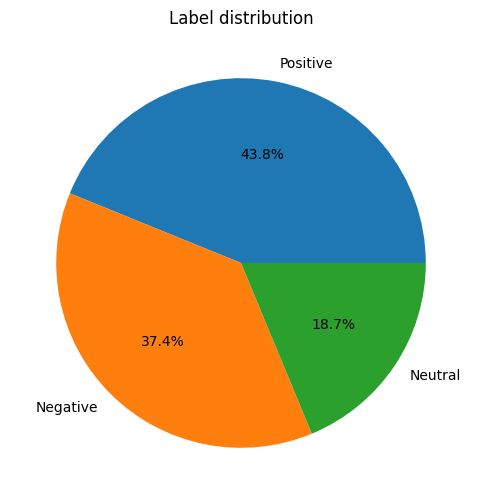

In [8]:
# plot pie chart of label distribution
plt.figure(figsize=(6, 6))
plt.pie(coronaTweet['Sentiment'].value_counts(), labels=coronaTweet['Sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('Label distribution')

# save the plot as png file
plt.savefig('../30_results/label_distribution.png')

### Word Cloud

In [9]:
def generate_wordcloud(df):
    '''
    Generate wordcloud for a given dataframe
    Input: dataframe
    Output: wordcloud
    '''
    # Create stopword
    stopwords = set(STOPWORDS)
    # Create color map
    color_map = ['Blues_r', 'Greens_r', 'Reds_r', 'Reds', 'Greens']
    # Generate a word cloud image
    for (idx, i) in enumerate(df['Sentiment'].unique()):
        text = df[df['Sentiment'] == i]['OriginalTweet'].to_string()
        wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap=color_map[idx], collocations=False, stopwords = STOPWORDS).generate(text)
        # Display the generated image
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(i)
        plt.axis("off")
        plt.show()
    

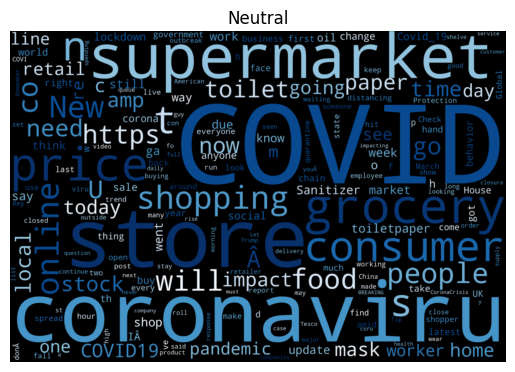

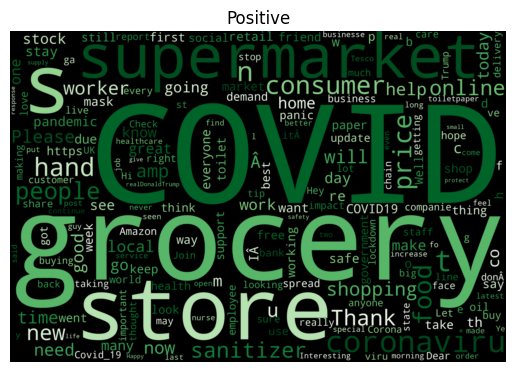

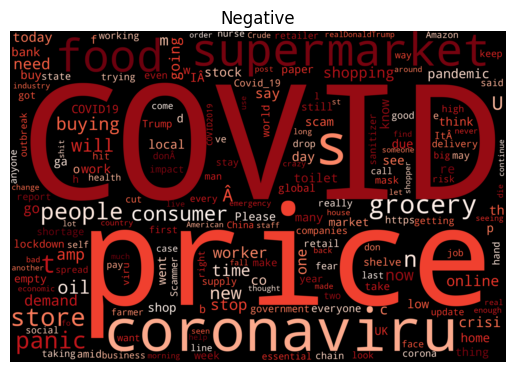

In [10]:
generate_wordcloud(coronaTweet)

### Number of words in a tweet

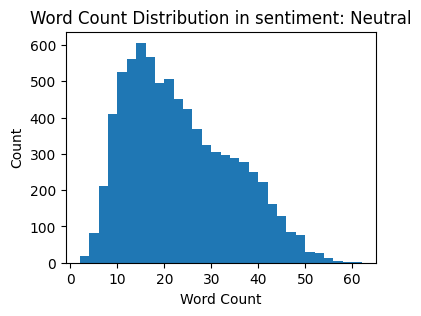

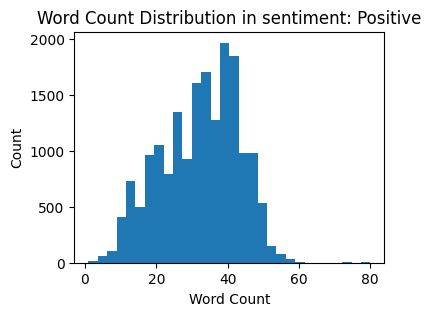

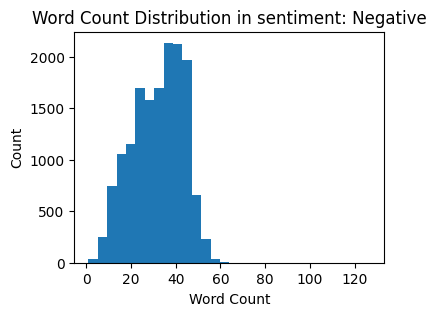

In [11]:
# calculate the word length in each category
coronaTweet['word_count'] = coronaTweet['OriginalTweet'].apply(lambda x: len(str(x).split(" ")))

# plot word length distribution in each category
for i in coronaTweet['Sentiment'].unique():
    plt.figure(figsize=(4, 3))
    plt.hist(coronaTweet[coronaTweet['Sentiment'] == i]['word_count'], bins=30)
    plt.title(f'Word Count Distribution in sentiment: {i}')
    plt.xlabel('Word Count')
    plt.ylabel('Count')
    plt.show()


### Most common words

In [12]:
# get all the corpus of tweets
def get_corpus(df):
    '''
    Get corpus of tweets
    Input: dataframe
    Output: corpus
    '''
    corpus = []
    for i in df['OriginalTweet'].str.split():
        for j in i:
            corpus.append(j)
    return corpus

In [13]:
corpus = get_corpus(coronaTweet)

In [14]:
# plot most common words
def plot_most_common_words(df, n):
    '''
    Plot most common words for a given dataframe
    Input: dataframe, number of words to plot
    Output: barplot
    '''
    # get stopwords
    stopwords = set(STOPWORDS)
    # start count
    counter=Counter(corpus)
    most=counter.most_common()
    word=[]
    count=[]
    for i, j in most[:40]:
        if (i not in stopwords) :
            word.append(i)
            count.append(j)
    return word, count

<AxesSubplot: >

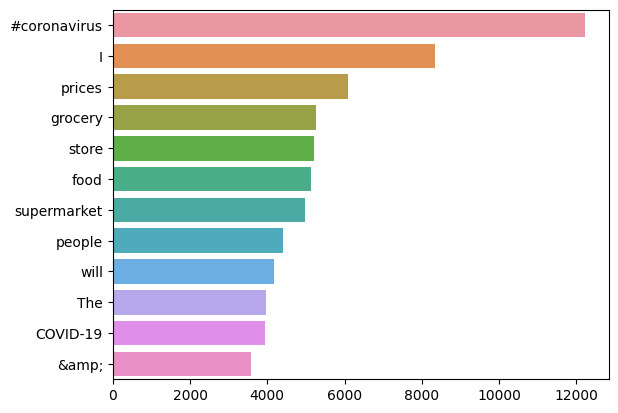

In [15]:
word, count = plot_most_common_words(coronaTweet, 40)
sns.barplot(x=count,y=word)

### Punctuations

In [16]:
# plot the punctuation and its appearance in tweets
def plot_punctuation(corpus):
    '''
    Plot the punctuation and its appearance in tweets
    Input: dataframe
    Output: barplot
    '''
    dic_punc = {}
    punctuation = string.punctuation
    for i in corpus:
        if i in punctuation:
            if i in dic_punc:
                dic_punc[i] += 1
            else:
                dic_punc[i] = 1
    return dic_punc           

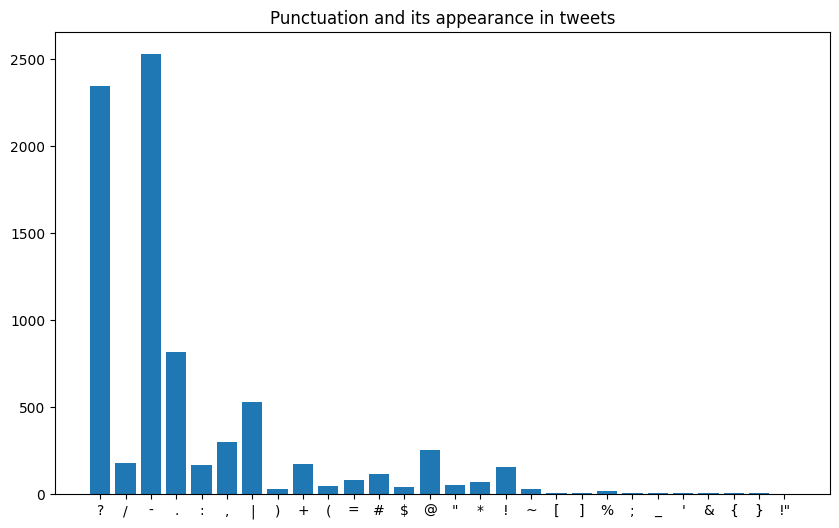

In [17]:
dic_punc = plot_punctuation(corpus)

# plot punctuation and its appearance in tweets
plt.figure(figsize=(10, 6))
plt.bar(dic_punc.keys(), dic_punc.values())
plt.title('Punctuation and its appearance in tweets')
plt.show()